In [271]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats
from matplotlib import pyplot as plt

In [125]:
plt.style.use('ggplot')

### A:

Simulate a single kinesin-type motor stepping along a microtubule (MT). At
t=0 (the start of a ‘run’) it should attach to a microtubule. At each subsequent
timestep it should have a probability of stepping, or falling off the MT (which ends
the run). Each successful step should advance it 8 nm. You should adjust the
stepping frequency so that the average velocity is 800 nm/sec, and should adjust
the off rate (probability of falling off the MT for a given step) so that the mean
travel distance is 800 nm. Important: the ‘timestep’ of the simulation should be
relatively small compared to the frequency of stepping, so on many ‘iterations’ of
the simulation there will be no step; the probability of a step must be the same on
each iteration.

In [234]:
def simulate_microtubule(n, ts, off_thresh, step_thresh):
    
    # initialize simulation
    step = np.random.randint(1,ts)
    output = []
    
    # simulate n runs
    for i in range(n):
        
        n_ts = 0 #number of timesteps
        motor_steps = 0
        detach = off_thresh + 1
        
        while detach >= off_thresh:
            
            n_ts += 1
            step = np.random.randint(1,ts)
            
            if step < step_thresh: 
                detach = np.random.randint(1,ts)
                if detach < off_thresh:
                    output.append([motor_steps, 8*motor_steps, n_ts, motor_steps*8/(n_ts/ts), n])
                else:
                    motor_steps += 1
    
    return output      

In [235]:
df = pd.DataFrame(data=simulate_microtubule(10000, 10000, 99, 102),
                  columns=["motor_steps","travel_distance","time_steps","velocity", 'runs']) 

In [241]:
# display statistics
df.describe()

motor_steps  travel_distance     time_steps      velocity  \
count  15110.000000     15110.000000   15110.000000  15110.000000   
mean     100.622237       804.977895   10061.803044    798.290861   
std      101.777890       814.223119   10136.944969    208.093369   
min        0.000000         0.000000       1.000000      0.000000   
25%       28.000000       224.000000    2853.000000    733.307956   
50%       70.000000       560.000000    6977.000000    796.634154   
75%      138.000000      1104.000000   13809.750000    861.546886   
max     1053.000000      8424.000000  111867.000000   8000.000000   

               runs  
count  15110.000000  
mean    7196.432826  
std     3957.611198  
min       10.000000  
25%     2560.000000  
50%    10000.000000  
75%    10000.000000  
max    10000.000000

### B:

Simulate different numbers of trials(e.g. 10, 20, 40, 80, 160, 1000 individual
‘runs’) and make corresponding histograms showing the distribution of run
lengths.

Text(0.06,0.5,'number of runs')

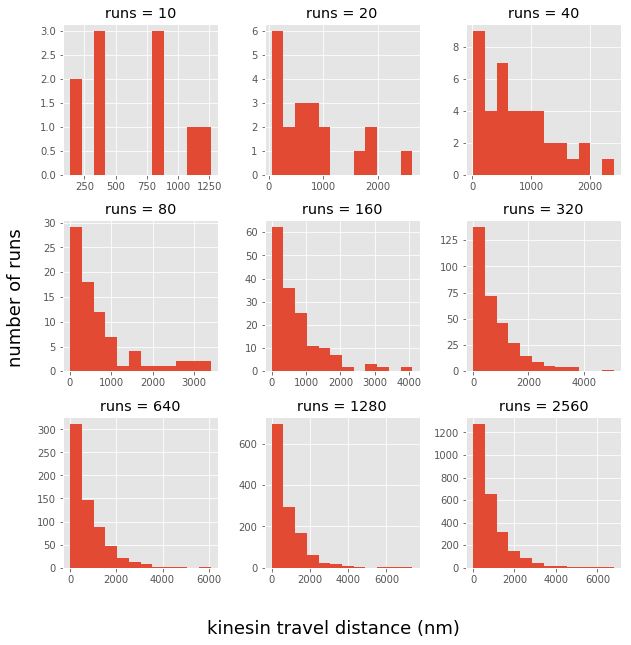

In [251]:
fig, axarr = plt.subplots(3,3, figsize=(10,10))
font = {'weight': 'normal',
        'size': 18}

runs = 10
for i in range(3):
    for j in range(3):
        cur_df = pd.DataFrame(data=simulate_microtubule(runs, 10000, 99, 102),
                      columns=["motor_steps","travel_distance","time_steps","velocity", "runs"]) 
        df = pd.concat([df, cur_df])
        cur_df.hist(column="travel_distance", ax=axarr[i,j], bins=12)
        axarr[i,j].set_title("runs = {}".format(runs))
        runs *= 2


fig.text(0.5, 0.04, 'kinesin travel distance (nm)', ha='center', va='center', fontdict=font)
fig.text(0.06, 0.5, 'number of runs', ha='center', va='center', rotation='vertical', fontdict=font)



In [253]:
df.describe()

motor_steps  travel_distance     time_steps      velocity  \
count  40660.000000     40660.000000   40660.000000  40660.000000   
mean     100.868224       806.945794   10095.639621    798.296161   
std      101.422947       811.383572   10107.545885    206.695202   
min        0.000000         0.000000       1.000000      0.000000   
25%       28.000000       224.000000    2883.000000    731.629714   
50%       70.000000       560.000000    7010.500000    796.204616   
75%      140.000000      1120.000000   13950.500000    861.605283   
max     1053.000000      8424.000000  111867.000000   8888.888889   

               runs  
count  40660.000000  
mean    3748.858829  
std     3656.499826  
min       10.000000  
25%     1280.000000  
50%     2560.000000  
75%     2560.000000  
max    10000.000000

### C:

Determine what sample size is required for reasonable estimate of the distribution’s
properties. First, confirm that your simulation is working correctly—generate a really large
number of runs (eg 10,000, and confirm that the mean travel is about 800 nm. If not, there is
a problem in your simulation). Next, for each choice of sample size from B, generate many
samples of that size, and determine a 95% CI (using standard t-test approach discussed in
class) and for each sample determine whether the calculated CI contains the actual mean of
the population (which you know to be 800 nm, by construction). Then, for that sample size,
determine the proportion of correct events, i.e. the number of tests that included 800, divided
by the total number of tests. Plot a graph of the proportion, as a function of the number of
elements in the sample. At some point (i.e. for some sample size N), the proportion should
get close to 0.95. When is that?
Finally, for each sample size, use the statistic we discussed in class (on proportions) : for
each sample size, does the 95% CI include 0.95?

In [302]:
def confidence_interval(df, num_runs, num_subsets, confidence=0.95):

#     runs_df = df[df["runs"] == num_runs]
#     subsets = []
#     for i in range(1,num_subsets):
#         subsets.append(runs_df.iloc[i*num_runs:(i+1)*num_runs])
    subsets = df.sample(num_runs)
    m, se = subsets.mean()["travel_distance"], scipy.stats.sem(subsets["travel_distance"])
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [308]:
confidence_interval(df, 40000, 6)

(806.4178, 796.4956773532039, 816.3399226467963)

Text(0.5,1,'Confidence intervals')

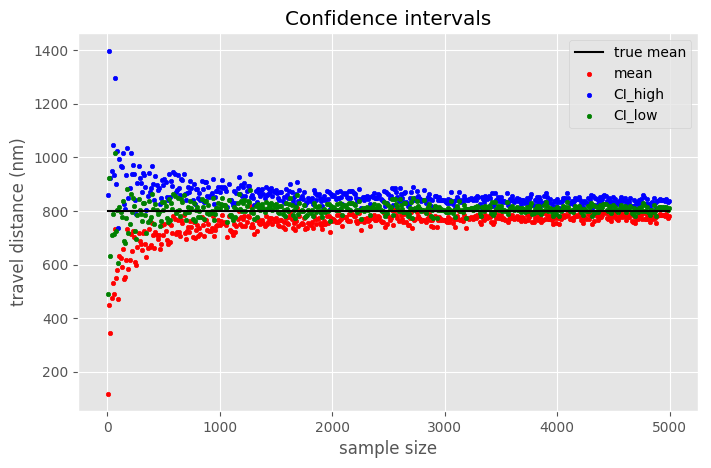

In [364]:
lower, means, upper = [],[],[]

for i in np.arange(10,5000,10):
    m,l,u = confidence_interval(df,i,6)
    lower.append(l)
    means.append(m)
    upper.append(u)

fig, ax = plt.subplots(1,1,figsize=(8,5),dpi=100)
ax.scatter(np.arange(10,5000,10), lower,s=10,color="red")
ax.scatter(np.arange(10,5000,10), upper,s=10,color="blue")
ax.scatter(np.arange(10,5000,10), means,s=10,color="green")
ax.plot(np.arange(10,5000,10), [800 for i in range(len(means))],color="black")
ax.legend(["true mean","mean","CI_high", "CI_low"])
ax.set_xlabel("sample size")
ax.set_ylabel("travel distance (nm)")
ax.set_title("Confidence intervals")